<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/fluidflow/gaspipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculation of pressure drop in gas pipelines

This notebook is part of [introduction to natural gas processing using NeqSim](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb).

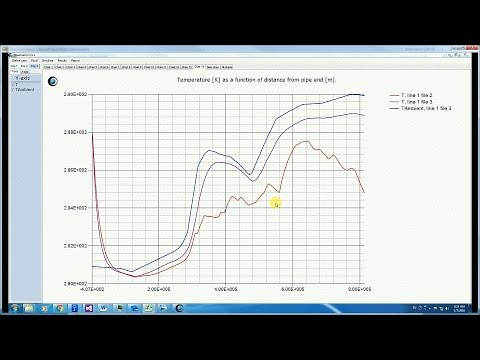

In [2]:
#@title Introduction to Calculation of pressure drop in gas pipelines
#@markdown Calculation of pressure drop in gas pipelines
from IPython.display import YouTubeVideo
YouTubeVideo('C4mq8QlOOsQ', width=600, height=400)

# Initialize use of NeqSim in Python

In [3]:
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')
%matplotlib inline

# Demo of a simple NeqSim gas pipeline simulation

In [4]:
from neqsim import methods
from neqsim.thermo import fluid, TPflash, createfluid2
from neqsim.process import pipe, pipeline, clearProcess, stream, runProcess

#Creating inlet fluid using SRK-EoS
names = ['CO2', 'nitrogen', 'methane', 'ethane']
molefractions = [0.03, 0.02, 0.85, 0.01]
fluid1 = createfluid2(names, molefractions)

#Creating stream and pipeline
clearProcess()
stream1 = stream(fluid1)
stream1.setFlowRate(60.0, "MSm3/day")
stream1.setTemperature(50.15, "C")
stream1.setPressure(200.0, "bara")

diameter = [1.1, 1.1, 1.1, 1.1, 1.1] #meter
roughnes = [50.0e-6, 50.0e-6, 50.0e-6, 150.0e-6, 150.0e-6] #meter
position = [0.0, 500.0, 1000.0, 1200.0, 700000.0] #meter
height = [0.0, -400.0, -800.0, -900.0, 0.0] #meter
outtemperatures =[278.15, 278.15, 278.15, 278.15, 278.15] #Kelvin
outHeatU = [25.0, 25.0, 25.0, 25.0, 25.0] #W/m2K
wallHeatU = [35.0, 35.0, 35.0, 35.0, 35.0] #W/m2K

pipe1 = pipeline(stream1, position, diameter, height, outtemperatures, roughnes,outHeatU,wallHeatU)
pipe1.setNumberOfNodesInLeg(100)
runProcess()
numberofnodes = pipe1.getPipe().getTotalNumberOfNodes()
print('outlet pressure ', pipe1.getPipe().getNode(numberofnodes-1).getBulkSystem().getPressure('bara'))
print('outlet temperature ', pipe1.getPipe().getNode(numberofnodes-1).getBulkSystem().getTemperature('C'))

outlet pressure  125.3236176238376
outlet temperature  2.1883351991511972


In [5]:
print('total number of legs ', pipe1.getPipe().getNumberOfLegs())
print('total number of nodes ', pipe1.getPipe().getTotalNumberOfNodes())
print('friction factor ', pipe1.getPipe().getNode(0).getWallFrictionFactor())
print('friction factor ', pipe1.getPipe().getNode(numberofnodes-1).getWallFrictionFactor())

total number of legs  4
total number of nodes  402
friction factor  0.010489688590064857
friction factor  0.012779053792689102


# Graphical output of pressure and temperature profile of pipeline

Text(0.5, 0, 'position [meter]')

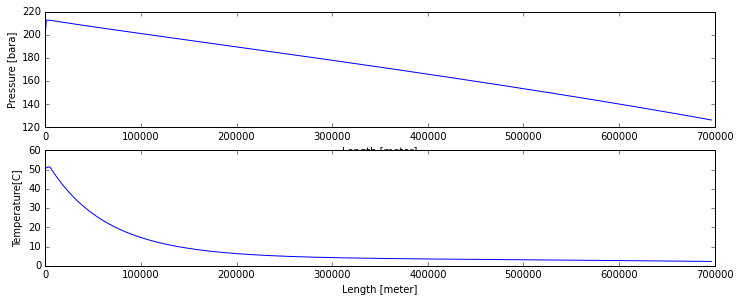

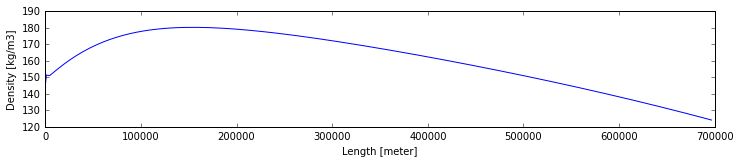

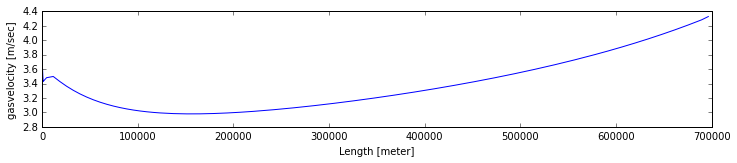

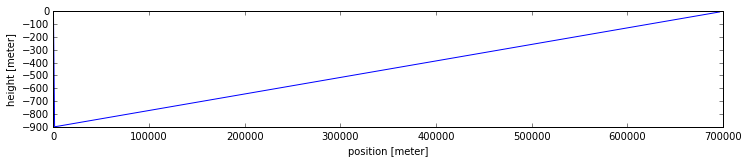

In [6]:
pres = []
temp = []
length = []
height = []
calcdensity = []
gasvelocity = []

for node in range (0,pipe1.getPipe().getTotalNumberOfNodes()-1):
  pres.append(pipe1.getPipe().getNode(node).getBulkSystem().getPressure('bara'))
  temp.append(pipe1.getPipe().getNode(node).getBulkSystem().getTemperature('C'))
  height.append(pipe1.getPipe().getNode(node).getVerticalPositionOfNode())
  length.append(pipe1.getPipe().getNode(node).getDistanceToCenterOfNode())
  calcdensity.append(pipe1.getPipe().getNode(node).getBulkSystem().getDensity('kg/m3'))
  gasvelocity.append(pipe1.getPipe().getNode(node).getVelocity()) 

plt.rcParams['figure.figsize'] = [12, 12]
plt.figure()
plt.subplot(5, 1, 1)
plt.plot(length, pres, '-')
plt.ylabel('Pressure [bara]')
plt.xlabel('Length [meter]')

plt.subplot(5, 1, 2)
plt.plot(length, temp)
plt.xlabel('Length [meter]')
plt.ylabel('Temperature[C]')

plt.figure()
plt.subplot(5, 1, 3)
plt.plot(length, calcdensity, '-')
plt.ylabel('Density [kg/m3]')
plt.xlabel('Length [meter]')

plt.figure()
plt.subplot(5, 1, 4)
plt.plot(length, gasvelocity, '-')
plt.ylabel('gasvelocity [m/sec]')
plt.xlabel('Length [meter]')

plt.figure()
plt.subplot(5, 1, 5)
plt.plot(length, height, '-')
plt.ylabel('height [meter]')
plt.xlabel('position [meter]')

# Pressure drop calculations based on simplified methods
In the follwing section we use simplified methods for calulating pressure drop in gas pipelines.

In [21]:
insideDiameter = 1.100
length = 1000.0
R = 8.314
inletPressure = 200.0
frictionFactor = 0.0102
area = 3.14*insideDiameter*insideDiameter/4.0
newPres = inletPressure

stream1 = stream(fluid1)
stream1.setFlowRate(60.0, "MSm3/day")
stream1.setTemperature(5.0, "C")

for i in range(700):
  print('presssure ', newPres)
  stream1.setPressure(newPres, "bara")
  stream1.run()
  stream1.getFluid().initProperties()
  velocity = stream1.getFlowRate('m3/sec') / area
  print(velocity)
  reynoldsNumber = velocity * insideDiameter/stream1.getFluid().getPhase(0).getPhysicalProperties().getKinematicViscosity()

  #newPres = math.sqrt(math.pow(stream1.getPressure('bara'), 2.0) - math.pow(4.0 * stream1.getFlowRate('m3/sec')/3.14, 2.0) * frictionFactor * length * stream1.getFluid().getPhase(0).getZ() * R * stream1.getFluid().getTemperature()/math.pow(insideDiameter, 5.0)/1.0e5)

  newPres = math.sqrt(math.pow(stream1.getPressure('bara'), 2.0) - stream1.getFluid().getPhase(0).getZ()*R*stream1.getFluid().getTemperature()*
                      math.pow(stream1.getFlowRate('kg/sec')/area, 2.0)*frictionFactor * length/insideDiameter/1.0e5)
  #print(newPres)
  #math.pow(4.0 * stream1.getFlowRate('m3/sec')/3.14, 2.0) * frictionFactor * length * stream1.getFluid().getPhase(0).getZ() * R * stream1.getFluid().getTemperature()/math.pow(insideDiameter, 5.0)/1.0e5)


stream1.getFluid().initProperties()


outletpressure = stream1.getPressure()
print('outlet pressure ',outletpressure)

presssure  200.0
2.8424317869505242


ValueError: ignored